# Introduction

In today's digital landscape, the Google Play Store serves as a pivotal platform for Android apps, housing millions of applications spanning various categories. For developers and marketers, understanding user preferences, sentiments, and behaviors within this ecosystem is paramount for app success.

# Objective
As a data analyst, I aim to utilize two datasets: one containing Google Play app information and another with user reviews and sentiment analysis to identify the key factors contributing to the success of mobile applications on the Google Play Store. Ultimately, this analysis will provide actionable insights to app developers and marketers, enabling them to optimize app development, refine marketing strategies, and enhance user experiences, thereby increasing the likelihood of app success on the Google Play Store.

In [1]:
import numpy as np # linear algebra|
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [2]:
playstore = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')
user_reviews = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv')

In [3]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
print(playstore.shape)
print('\n')
print(user_reviews.shape)

(10841, 13)


(64295, 5)


In [5]:
print(playstore.info())
print('\n')
print(user_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dty

In [6]:
print(playstore.isnull().sum())
print('\n')
print(user_reviews.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


# Data Preprocessing

In [7]:
#handling missing values
playstore.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
threshold = len(playstore) * 0.05
cols_to_drop = playstore.columns[playstore.isna().sum() <= threshold]
playstore.dropna(subset=cols_to_drop,inplace=True)

In [9]:
playstore.isna().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [10]:
playstore[playstore['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Since there is no way to deal with right now We will not drop na values in review

In [11]:
#Chaning types
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
playstore.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [13]:
#changing date
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'])

playstore['Installs'] = playstore['Installs'].str.replace(r'[,+]', '', regex=True)
playstore['Installs'] = playstore['Installs'].astype('int')

playstore['Reviews'] = playstore['Reviews'].astype('int')


In [14]:
playstore.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                      object
Installs                   int64
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [15]:
user_reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [16]:
# droppping NA values
# since we need Sentinment to perform any Sentimental Analysis
# we can drop those with NA values in Sentiment

user_reviews.dropna(subset=['Sentiment'],inplace = True)

In [17]:
user_reviews.isna().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [18]:
user_reviews.dropna(inplace= True)
user_reviews.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [19]:
user_reviews.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [20]:
playstore[playstore.duplicated]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,5000000,Free,0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,10000000,Free,0,Everyone,Business,2018-07-31,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,5000000,Free,0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,10000000,Free,0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,1000000,Free,0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,10000000,Free,0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,1000000,Free,0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,100000000,Free,0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,10000,Free,0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up


In [21]:
# Removing Duplicates
col = ['App','Size','Type','Genres']
playstore.drop_duplicates(subset=col , keep='first',inplace = True)

In [22]:
# playstore[playstore.duplicated(['App','Size','Type','Genres','Last Updated'])]

# Analysis

In [23]:
playstore.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6779,BT MeetMe with Dolby Voice,COMMUNICATION,3.6,437,12M,100000,Free,0,Everyone,Communication,2018-07-13,2.66.5,5.0 and up
3841,Czech Public Transport IDOS,MAPS_AND_NAVIGATION,4.3,26014,7.7M,1000000,Free,0,Everyone,Maps & Navigation,2017-11-06,2.4.1,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68M,1000,Paid,$33.99,Everyone,Medical,2017-10-02,2.1.35,4.0 and up
2469,ExtendedCare Virtual Care Room,MEDICAL,NaN,0,18M,5,Free,0,Everyone,Medical,2018-07-30,1.0,5.1 and up
619,Random Chat App with Strangers,DATING,3.0,2,16M,100,Free,0,Mature 17+,Dating,2018-07-17,2.5,4.0.3 and up


In [24]:
user_reviews.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
59708,Hangouts,Doesn't work me... A friend suggested Hangouts...,Positive,0.700000,0.600000
49068,Free Dating App & Flirt Chat - Cheers,"Great chatting, interesting people chat",Positive,0.650000,0.625000
22020,Calorie Counter - MyFitnessPal,"Great app, works! I'm guessing update last day...",Positive,0.194643,0.512798
62693,Home Scouting® MLS Mobile,You need password get in. Dumb.,Negative,-0.375000,0.500000
2911,AP Mobile - Breaking News,This best news far opinion. I tried many get u...,Positive,0.431250,0.550000


In [25]:
user_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

## Q) Which app categories have the highest average ratings and user reviews?


In [26]:
playstore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

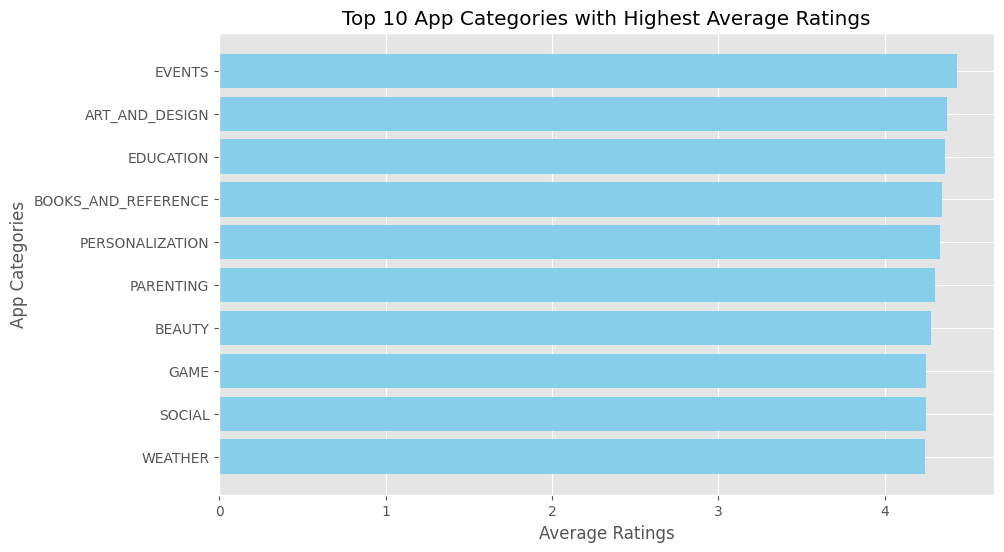

In [27]:
df = playstore.groupby('Category',as_index=False)['Rating'].mean().\
     sort_values(by=['Rating'],ascending = False).head(10)

# sns.barplot(data=df, y='Category',x='Rating')
# plt.title("Top 10 App Categories with Highest Average ")
# plt.show()

categories = df['Category'][::-1]
ratings = df['Rating'][::-1]

plt.figure(figsize=(10, 6))
plt.barh(categories, ratings, color='skyblue')

plt.xlabel('Average Ratings')
plt.ylabel('App Categories')
plt.title('Top 10 App Categories with Highest Average Ratings')

# Show plot
plt.show()

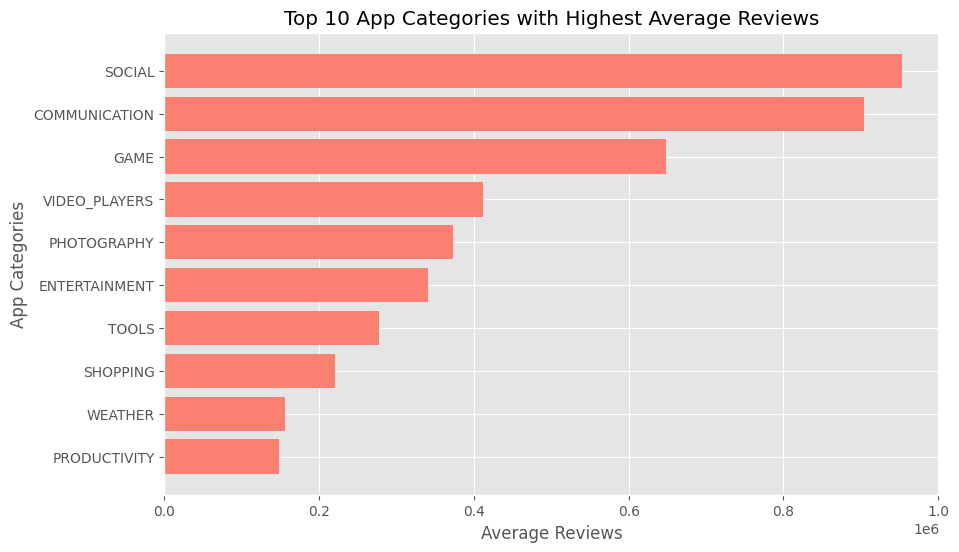

In [28]:
df = playstore.groupby('Category',as_index=False)['Reviews'].mean().\
     sort_values(by='Reviews',ascending = False).head(10)

# sns.barplot(data=df, y='Category',x='Reviews')
# plt.title("Top 10 App Categories with Highest Average Reviews")
# plt.show()

categories = df['Category'][::-1]
reviews = df['Reviews'][::-1]

plt.figure(figsize=(10, 6))
plt.barh(categories, reviews, color='salmon')

# Add labels and title
plt.xlabel('Average Reviews')
plt.ylabel('App Categories')
plt.title('Top 10 App Categories with Highest Average Reviews')

# Show plot
plt.show()

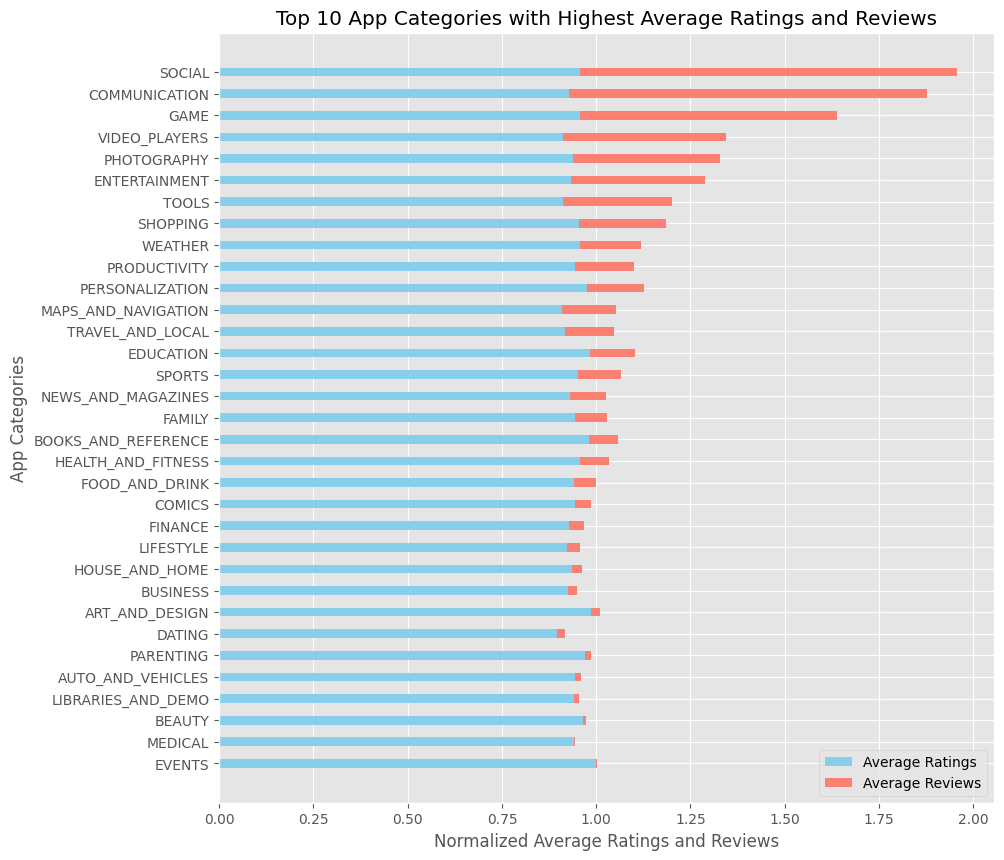

In [29]:
df = playstore.groupby('Category',as_index=False)[['Rating','Reviews']].mean().\
sort_values(by=['Reviews','Rating'],ascending = False)

categories = df['Category'][::-1]
ratings = df['Rating'][::-1]
reviews = df['Reviews'][::-1]

# Normalize the data
ratings_norm = ratings / np.max(ratings)
reviews_norm = reviews / np.max(reviews)

# Create horizontal bar plot
plt.figure(figsize=(10, 10))
bar_width = 0.4
index = np.arange(len(categories))


plt.barh(index, ratings_norm, bar_width, color='skyblue', label='Average Ratings')
plt.barh(index, reviews_norm, bar_width, color='salmon', label='Average Reviews', left=ratings_norm)

# Add labels and title
plt.xlabel('Normalized Average Ratings and Reviews')
plt.ylabel('App Categories')
plt.title('Top 10 App Categories with Highest Average Ratings and Reviews')
plt.yticks(index, categories)
plt.legend()

# Show plot
plt.show()

While App with categories such as Events , Art & Designs and Education have the highest rating on average. It should also be mention that apps from categories like Social, Communication and Games have the highest Average Reviews accross all the categories.

So the top categories are with alot of reviews and still have a relatively highest 

### Q) What is the proportion of paid games versus free games in the dataset?

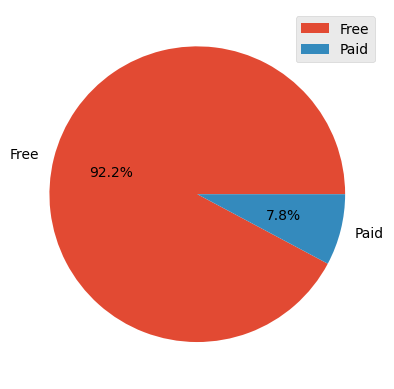

In [30]:
df = playstore['Type'].value_counts()
labels = df.index
plt.pie(df,labels = labels, autopct='%1.1f%%')
plt.legend()

In [31]:
df = playstore.copy()
df= df[['Category','Last Updated','Genres']]
df.head()

,Category,Last Updated,Genres
0,ART_AND_DESIGN,2018-01-07,Art & Design
1,ART_AND_DESIGN,2018-01-15,Art & Design;Pretend Play
2,ART_AND_DESIGN,2018-08-01,Art & Design
3,ART_AND_DESIGN,2018-06-08,Art & Design
4,ART_AND_DESIGN,2018-06-20,Art & Design;Creativity


In [32]:
df['Year'] = df['Last Updated'].dt.year
df.head()

,Category,Last Updated,Genres,Year
0,ART_AND_DESIGN,2018-01-07,Art & Design,2018
1,ART_AND_DESIGN,2018-01-15,Art & Design;Pretend Play,2018
2,ART_AND_DESIGN,2018-08-01,Art & Design,2018
3,ART_AND_DESIGN,2018-06-08,Art & Design,2018
4,ART_AND_DESIGN,2018-06-20,Art & Design;Creativity,2018


In [33]:
df[df['Category'].isin(['GAME','COMMUNICATION','SOCIAL']) ].groupby(['Category','Year']).count()

Last Updated  Genres
Category      Year                      
COMMUNICATION 2012             1       1
              2013             3       3
              2014            10      10
              2015            19      19
              2016            22      22
              2017            56      56
              2018           205     205
GAME          2011             4       4
              2012             2       2
              2013            18      18
              2014            26      26
              2015            62      62
              2016            79      79
              2017           175     175
              2018           597     597
SOCIAL        2013             2       2
              2014             4       4
              2015             9       9
              2016            17      17
              2017            36      36
              2018           171     171

Q) Which app categories have the highest average ratings and user reviews? <br>
Q) What is the current trend? (narrowing app release date after 2020s <br>
Q) Free vs Paid <br>
Q) If paid - what is the most use category. (under 5$ , 5-10 , 10-15 ...) <br>
       -  which cateory has better reviews. (ik it doesnt but sometimes price do affect ones mind) <br>
Q) Pick 3 most cateories. according to trend and see what kind of apps do they make. <br>
         - what i am saying is one cat gaming has many genres in itself so which one popping the most. <br>
